In [2]:
%matplotlib inline


A simple regression analysis on the Boston housing data
========================================================

Here we perform a simple regression analysis on the Boston housing
data, exploring two types of regressors.




In [51]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
from sklearn.datasets import load_boston
d = load_boston()
data = pd.read_csv(r"C:\Users\User\Downloads\boston_house_prices.csv")
features = data.drop('MEDV', axis = 1)
feature_names=list(data)
something=pd.DataFrame([data['RM'],data['LSTAT'],data['PTRATIO'],data['DIS']]).T   

Print a histogram of the quantity to predict: price



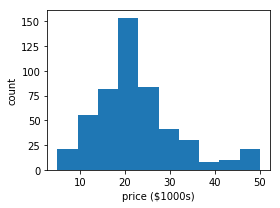

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.hist(data.MEDV)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

Print the join histogram for each feature



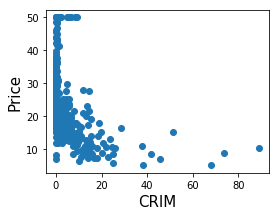

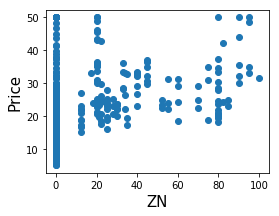

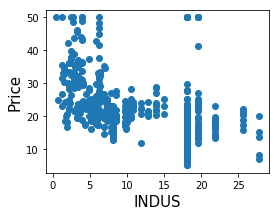

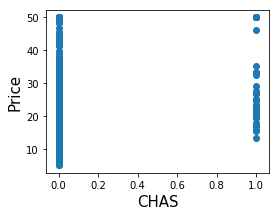

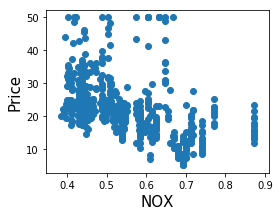

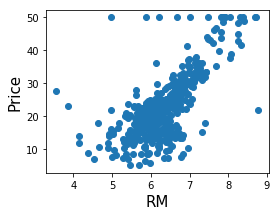

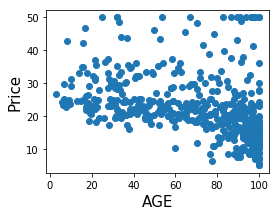

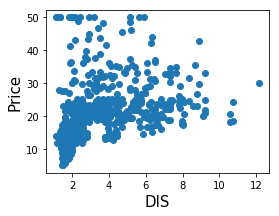

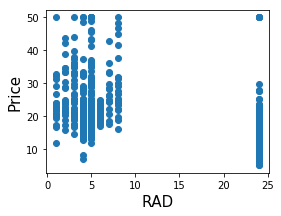

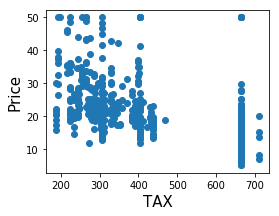

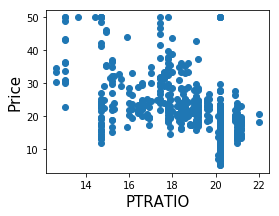

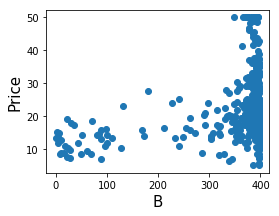

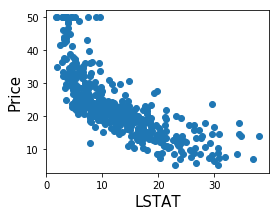

In [79]:
for index, feature_name in enumerate(list(features)):
    plt.figure(figsize=(4, 3))
    plt.scatter(d.data[:, index], data.MEDV)
    plt.ylabel('Price', size=15)
    plt.xlabel(list(features)[index], size=15)
    #plt.tight_layout()
plt.show()

Simple prediction



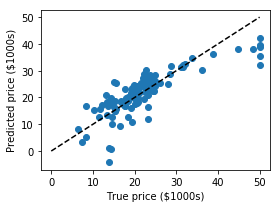

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(something,data.MEDV)

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.show()

Prediction with gradient boosted tree



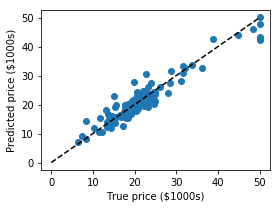

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.show()

Print the error rate



In [56]:
import numpy as np
print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

plt.show()

RMS: 2.6351469868025328 


In [57]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [58]:
# Calculate the performance of this model
score = performance_metric(predicted,expected)
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.886.
